# Movies Dataset Analysus

## Libraies and Dataset

### Importing Libraries

In [1]:
## Packages
import os
import pandas as pd
import numpy as np
import statistics
import scipy
import ast
import json
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go 


## Basic settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### Importing Dataset

In [2]:
movies_datasets = pd.read_csv(os.getcwd() + "/Datasets/movies_metadata.csv", sep=",", low_memory=False, header=0)
movies_datasets = pd.DataFrame(movies_datasets)

print(movies_datasets.dtypes)

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


## Data Cleaning

### Transforming Variables

In [3]:
## Transforming release_date to date format
movies_datasets['release_date'] = pd.to_datetime(movies_datasets.release_date, errors='coerce')

# Parting DataSet
filter_date = '1990-01-01'
date_filter = movies_datasets.release_date >= filter_date
movies_datasets = movies_datasets.loc[date_filter]

## Transforming budget to numeric format
movies_datasets['budget'] = pd.to_numeric(movies_datasets['budget'], errors = 'coerce')

## Transforming popularity to numeric format
movies_datasets['popularity'] = pd.to_numeric(movies_datasets['popularity'], errors = 'coerce')

## Creating profit column and percentage profit column
movies_datasets['profit'] = (movies_datasets['revenue'] - movies_datasets['budget'] )
movies_datasets['profit_percentage'] = ((movies_datasets['revenue']/movies_datasets['budget'])-1)*100


## Extracting Country & Production Company 

def extract_names(mv_str):
    if isinstance(mv_str, float):
        pass
    else:
        values = []
        mv_str = ast.literal_eval(mv_str)
        if isinstance(mv_str, list):
            for mv_str_i in mv_str:
                values.append(mv_str_i['name'])
            return values
        else:
            return None
    
movies_datasets[['genres','production_companies','production_countries','spoken_languages']] = movies_datasets[['genres','production_companies','production_countries','spoken_languages']].applymap(extract_names)


### Replacing Values for NaN

In [4]:
# Dataset 1
movies_datasets = movies_datasets.replace('0', np.nan).replace(0, np.nan).replace('',np.nan)
movies_datasets.production_countries = movies_datasets.production_countries.apply(lambda y: np.nan if len(y) == 0 else y)
movies_datasets.production_companies = movies_datasets.production_companies.apply(lambda y: np.nan if len(y) == 0 else y)
movies_datasets.genres = movies_datasets.genres.apply(lambda y: np.nan if len(y) == 0 else y)

### Filter Dataset

In [5]:
# Selecting year from 1990 - 31129999

start_date = '2000-01-01'
start_date1 = '2010-01-01'

# Full Dataset
date_filter = movies_datasets.release_date >= start_date
movies_datasets = movies_datasets.loc[date_filter]


# # Full Dataset
# date_filter = movies_datasets.release_date >= start_date
# movies_datasets_full = movies_datasets.loc[date_filter]

# # Fraction Dataset
# date_filter1 = movies_datasets.release_date >= start_date1
# movies_datasets_2010 = movies_datasets.loc[date_filter1]


In [6]:
# # Dataset 1
# movies_datasets_full = movies_datasets_full.replace('0', np.nan).replace(0, np.nan).replace('',np.nan)
# movies_datasets_full.production_countries = movies_datasets_full.production_countries.apply(lambda y: np.nan if len(y) == 0 else y)
# movies_datasets_full.production_companies = movies_datasets_full.production_companies.apply(lambda y: np.nan if len(y) == 0 else y)
# movies_datasets_full.genres = movies_datasets_full.genres.apply(lambda y: np.nan if len(y) == 0 else y)

In [7]:
# # Dataset 2
# movies_datasets_2010 = movies_datasets_2010.replace('0', np.nan).replace(0, np.nan).replace('',np.nan)
# movies_datasets_2010.production_countries = movies_datasets_2010.production_countries.apply(lambda y: np.nan if len(y) == 0 else y)
# movies_datasets_2010.production_companies = movies_datasets_2010.production_companies.apply(lambda y: np.nan if len(y) == 0 else y)
# movies_datasets_2010.genres = movies_datasets_2010.genres.apply(lambda y: np.nan if len(y) == 0 else y)



## Descriptive Analysis

### Overview on Dataset

In [8]:
## Dataset 
movies_datasets.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,profit,profit_percentage
707,False,NaN,NaN,"[Drama, Foreign]",NaN,131232,tt0333373,en,Due Amici,"Two Sicilian friends, Nunzio and Pino, share t...",0.003949,/jo4n8M8EHedIuatB39C8EEmJBH8.jpg,NaN,[Italy],2002-03-20,NaN,86.0,[Italiano],Released,NaN,Two Friends,NaN,NaN,NaN,NaN,NaN
868,False,NaN,NaN,"[Drama, Romance]",NaN,79782,tt1684935,en,Wenecja,An atmospheric coming-of-age story featuring a...,0.147130,/lUmJiBTKdesFDkgSvV9zecCgNO6.jpg,NaN,NaN,2010-05-25,NaN,110.0,[Polski],Released,NaN,Venice,NaN,7.5,4.0,NaN,NaN
1081,False,NaN,NaN,"[Comedy, Horror]",NaN,141210,tt2250194,en,The Sleepover,"The town of Derry has a secret, but no one tol...",0.135596,/pQpyEmFTGaox4yLuUXmiD2IDIbA.jpg,NaN,NaN,2013-10-12,NaN,6.0,[],Released,NaN,The Sleepover,NaN,8.0,1.0,NaN,NaN


### Variables Transformation

In [9]:
# Dataset 1

## Function to Transform Strings

def aggre_filter(dataframe_aggre, name):
    new_data_frame = dataframe_aggre.value_counts().reset_index()
    new_data_frame.columns = [name, 'Movies']
    for i in range(0,len(new_data_frame.iloc[:,0])):
        new_data_frame.iloc[i,0] = str(new_data_frame.iloc[i,0])
    new_data_frame = new_data_frame.iloc[0:15,]
    return new_data_frame

movies_per_country = aggre_filter(movies_datasets.production_countries, 'Countries')
movies_per_company = aggre_filter(movies_datasets.production_companies, 'Companies')
movies_per_genres = aggre_filter(movies_datasets.genres, 'Genres')
movies_per_language = aggre_filter(movies_datasets.original_language, 'Language')


In [10]:
movies_datasets.columns.values

array(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'profit', 'profit_percentage'],
      dtype=object)

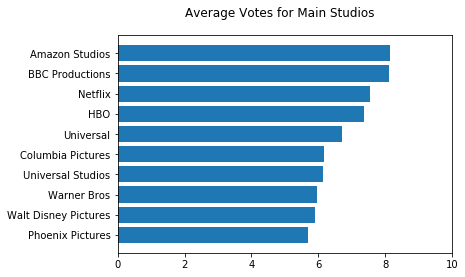

In [11]:
# movd = movies_datasets[['production_companies','vote_average']].dropna()
# movd.production_companies = movd.production_companies.apply(lambda x: str(x))
# # movd = movd[movd.production_companies.map(len)  50 & movd.production_companies.str.contains('Disney',case=False)]
# movd = movd[movd.production_companies.str.contains('Netflix',case=False)]

# movd = movd.groupby(['production_companies']).mean()
# movd = movd.sort_values(by = 'vote_average',ascending=False)
# movd = pd.DataFrame(movd)

# movd

new_dt = {'Studio' : ['Walt Disney Pictures','Amazon Studios', 'BBC Productions','HBO','Universal','Netflix','Warner Bros','Columbia Pictures','Universal Studios','Phoenix Pictures'], 
                      'Vote_Average' : [5.90,8.15,8.10,7.36,6.7,7.53,5.96, 6.18, 6.15, 5.7]}

new_dt = pd.DataFrame(new_dt)
new_dt = new_dt.sort_values(by = 'Vote_Average', ascending=True)
plt.suptitle('Average Votes for Main Studios')
plt.barh('Studio', 'Vote_Average', align='center',data = new_dt)
plt.xlim(0,10)
plt.savefig('img5.png',bbox_inches='tight')


In [12]:
# Dataset 1

## Function to Transform Strings

# def aggre_filter(dataframe_aggre, name):
#     new_data_frame = dataframe_aggre.value_counts().reset_index()
#     new_data_frame.columns = [name, 'Movies']
#     for i in range(0,len(new_data_frame.iloc[:,0])):
#         new_data_frame.iloc[i,0] = str(new_data_frame.iloc[i,0])
#     new_data_frame = new_data_frame.iloc[0:15,]
#     return new_data_frame

# movies_per_country = aggre_filter(movies_datasets_full.production_countries, 'Countries')
# movies_per_company = aggre_filter(movies_datasets_full.production_companies, 'Companies')
# movies_per_genres = aggre_filter(movies_datasets_full.genres, 'Genres')
# movies_per_language = aggre_filter(movies_datasets_full.original_language, 'Language')


In [13]:
# # Dataset 2

# ## Function to Transform Strings

# def aggre_filter(dataframe_aggre, name):
#     new_data_frame = dataframe_aggre.value_counts().reset_index()
#     new_data_frame.columns = [name, 'Movies']
#     for i in range(0,len(new_data_frame.iloc[:,0])):
#         new_data_frame.iloc[i,0] = str(new_data_frame.iloc[i,0])
#     new_data_frame = new_data_frame.iloc[0:15,]
#     return new_data_frame

# movies_per_country1 = aggre_filter(movies_datasets_2010.production_countries, 'Countries')
# movies_per_company1 = aggre_filter(movies_datasets_2010.production_companies, 'Companies')
# movies_per_genres1 = aggre_filter(movies_datasets_2010.genres, 'Genres')
# movies_per_language1 = aggre_filter(movies_datasets_2010.original_language, 'Language')


# EXLCUDE AFTER LINKEDIN

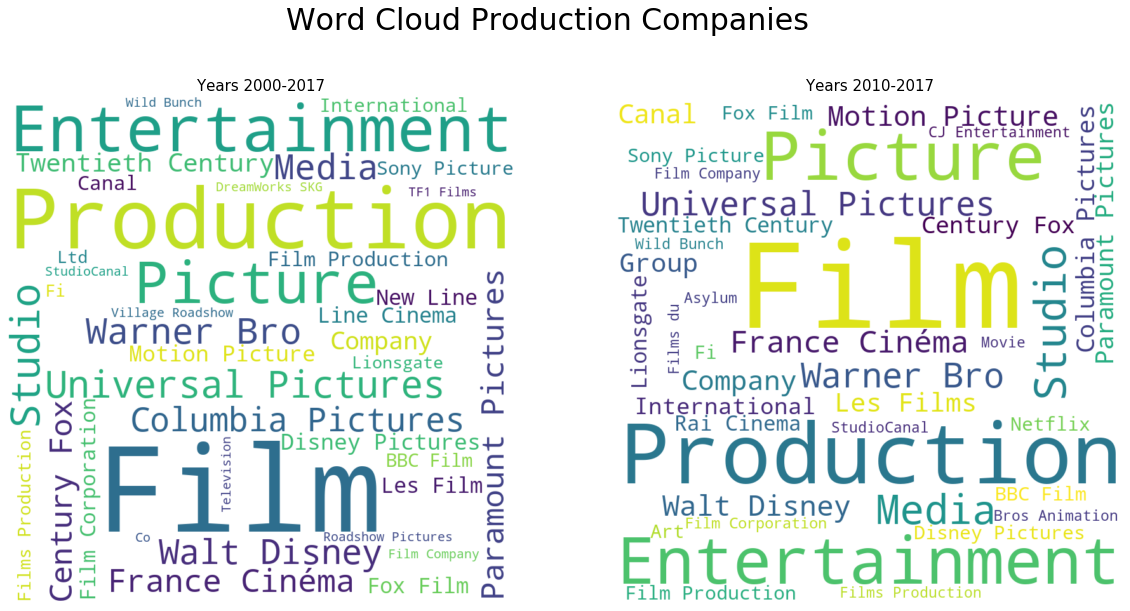

In [70]:
### Temporary to Exclude from Kagle - WordCLoud
data = '2010-01-01'
filter_data = movies_datasets.release_date >= data
movies_datasets2 = movies_datasets.loc[filter_data] 

# stopwords = set(STOPWORDS)


    
# wordcloud1 = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords,
#                 max_words=40,
#                 min_font_size = 10).generate(str(movies_datasets.production_companies.dropna()))
    
# wordcloud2 = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords,
#                 max_words=40,
#                 min_font_size = 10).generate(str(movies_datasets2.production_companies.dropna()))

# fig, axs = plt.subplots(1,2, figsize=(20,10))
# fig.suptitle('Word Cloud Production Companies', fontsize = 30)

# axs[0].set_title('Years 2000-2017',fontsize = 15)
# axs[0].imshow(wordcloud1,interpolation="bilinear")
# axs[0].axis("off")

# axs[1].set_title('Years 2010-2017',fontsize = 15)
# axs[1].imshow(wordcloud2,interpolation="bilinear")
# axs[1].axis("off")

# plt.show()

# fig.savefig('img2.png',bbox_inches='tight')



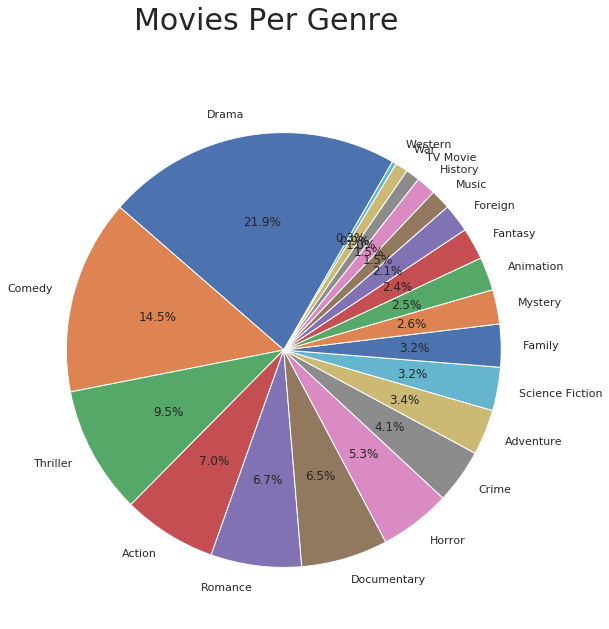

In [16]:
# helper functions to deal with multi-hot features
def group_indices(series,index="id"):
    d={}
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:
            d.setdefault(x[index],[])
            d[x[index]].append(i)
    return d

def get_groups(series,index="name"):
    s=set()
    for i in range(series.size):
        l=eval(series.iloc[i])
        for x in l:s.add(x[index])
    return list(s)

def multi_count(series,index="id"):
    return {k:len(v) for (k,v) in group_indices(series,index).items()}

def expand_multi_feature(df,column,index="id"):
    groups=group_indices(df[column],index=index)
    result=pd.DataFrame()
    for name,indices in groups.items():
        rows=df.iloc[indices].copy()
        rows[column]=name
        result=result.append(rows)
    return result

def multi_groupby(df,column,index="id"):
    return expand_multi_feature(df,column,index).groupby(column)

# numbers of movies of different genres and keywords
def multi_bar(series):    
    sns.set(style="whitegrid")
    count=multi_count(series,"name")
    count=sorted(count.items(),key=lambda x:x[1],reverse=True)
    count=dict(count[:20])
    f, ax = plt.subplots(figsize=(20, 10))
    plt.xticks(rotation=85, fontsize=15)
    plt.suptitle('Movies Per Genre', fontsize=30)
#     plt.bar(count.keys(),count.values(),align="center")
    plt.pie(count.values(),labels=count.keys(), autopct='%1.1f%%', startangle=60)
    plt.show()
    f.savefig('img3.png',bbox_inches='tight')

    
movies_datasets = pd.read_csv(os.getcwd() + "/Datasets/movies_metadata.csv", sep=",", low_memory=False, header=0)
movies_datasets = pd.DataFrame(movies_datasets)

start_date = '2000-01-01'

# Full Dataset
date_filter = movies_datasets.release_date >= start_date
movies_datasets = movies_datasets.loc[date_filter]

# ## Transforming budget to numeric format
# movies_datasets['budget'] = pd.to_numeric(movies_datasets['budget'], errors = 'coerce')

# ## Transforming popularity to numeric format
# movies_datasets['popularity'] = pd.to_numeric(movies_datasets['popularity'], errors = 'coerce')

# ## Creating profit column and percentage profit column
# movies_datasets['profit'] = (movies_datasets['revenue'] - movies_datasets['budget'] )
# movies_datasets['profit_percentage'] = ((movies_datasets['revenue']/movies_datasets['budget'])-1)*100

multi_bar(movies_datasets.genres.dropna())

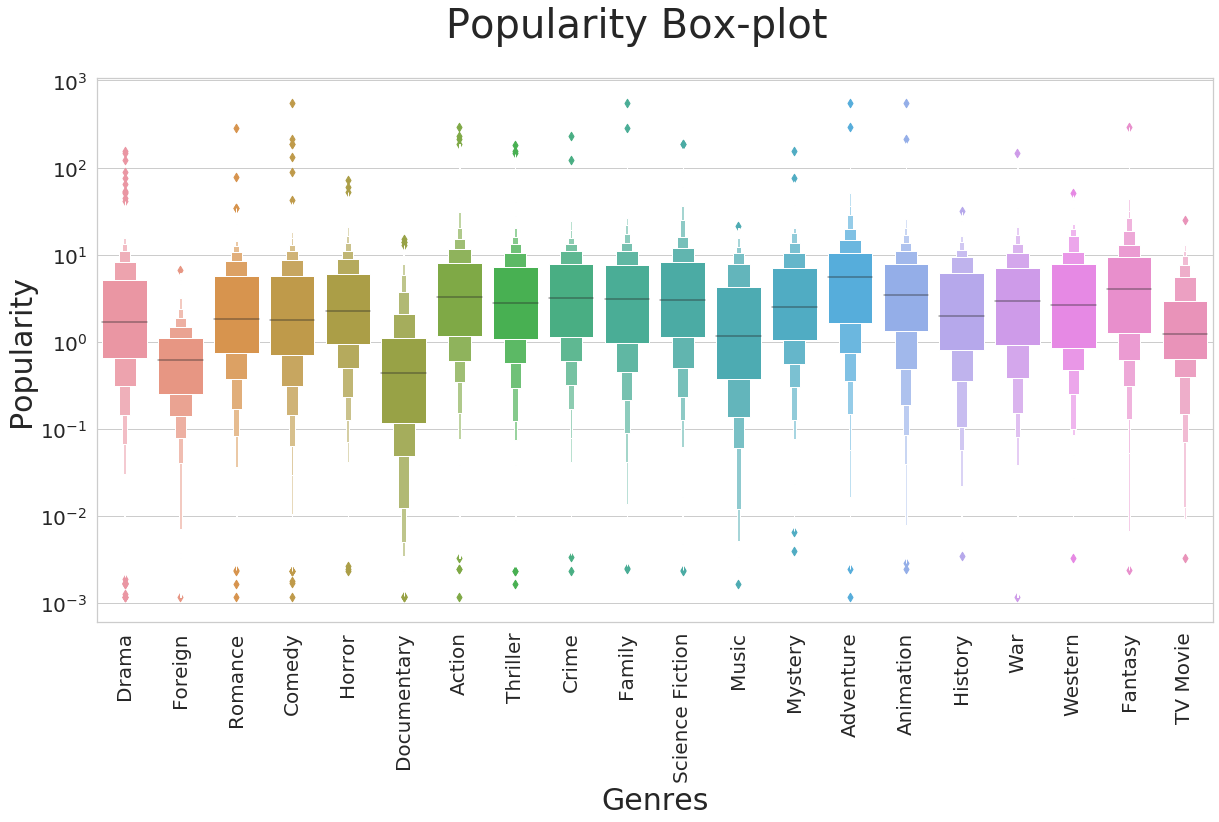

In [163]:
# distribution of popularity and runtime groupby genres
def plotby_box(df,x,y,yscale="linear"):
    sns.set(style="whitegrid")
    df=df.replace(0,np.nan).copy()
    f,ax=plt.subplots(figsize=(20, 10))
    sns.boxenplot(data=expand_multi_feature(df,x,"name"),x=x,y=y)
    plt.yscale(yscale)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=90,fontsize=20)
    plt.xlabel('Genres',fontsize=30)
    plt.ylabel('Popularity',fontsize=30)
    plt.suptitle('Popularity Box-plot',fontsize=40)
    plt.show()
    f.savefig('img4.png',bbox_inches='tight')
    
movies_datasets['popularity'] = pd.to_numeric(movies_datasets['popularity'], errors = 'coerce')
movies_datasets['profit'] = (movies_datasets['revenue'] - movies_datasets['budget'] )

df_filtered = movies_datasets[movies_datasets['popularity'] > 0] 


plotby_box(df_filtered,"genres","popularity",yscale="log")
# # # plotby_violin(tmdb_5000,"genres","runtime",yscale="linear",filename="genres_runtime.png")

In [119]:
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'])
            return values
        else:
            return None

def counting_values(df, column):
    value_count = {}
    for row in df[column]:
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

movies_datasets = pd.read_csv(os.getcwd() + "/Datasets/movies_metadata.csv", sep=",", low_memory=False, header=0)
movie_meta = pd.DataFrame(movies_datasets)

movie_meta[['genres', 'production_companies', 'production_countries', 'spoken_languages']] = movie_meta[['genres', 'production_companies', 'production_countries', 'spoken_languages']].applymap(get_values)

movie_meta['release_date'] = pd.to_datetime(movie_meta.release_date, errors='coerce')

start_date = '2000-01-01'

# Full Dataset
date_filter = movie_meta.release_date >= start_date
movie_meta = movie_meta.loc[date_filter]

def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

countries = pd.Series(counting_values(movie_meta, 'production_countries'))

# #the map didn't come out so interesting in a regular scale, so I changed it to a logarithmic one:
ln_countries = pd.Series(np.log(countries.values), index = countries.index)

data = dict(type = 'choropleth',
           locations = ln_countries.index,
           locationmode = 'country names',
#            colorscale = 'Blackbody',
           text = countries.values,
           z = ln_countries.values,
           colorbar = {'title': 'log of Sum of Movies'})

data

layout = dict(title = 'Movies Filmed in Countries around the World',
             geo = dict(showframe = False,
                       projection = {'type': 'Natural Earth'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)



In [76]:
### Temporary to Exclude from Kagle 

# movd = movies_datasets[['genres','popularity']].dropna()
# movd.genres = movd.genres.apply(lambda x: str(x))
# movd = movd.groupby(['genres']).mean()
# movd = movd.sort_values(by = 'popularity',ascending=False)
# movd.head(700)


NameError: name 'group_indices' is not defined

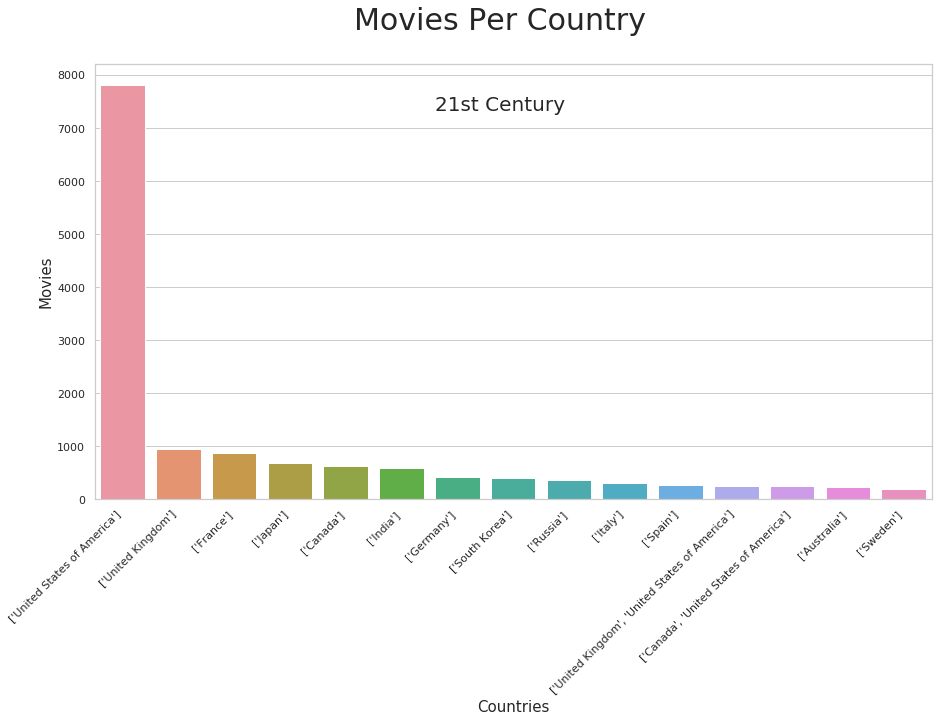

In [123]:
### Temporary to Exclude from Kagle 
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
plt.suptitle('Movies Per Country',fontsize=30)
plt.figtext(.5,.8,'21st Century',fontsize=20,ha='center')
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Quantity Movies', fontsize=15)
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Countries', y = 'Movies', data=movies_per_country)
plt.savefig('img1.png',bbox_inches='tight')


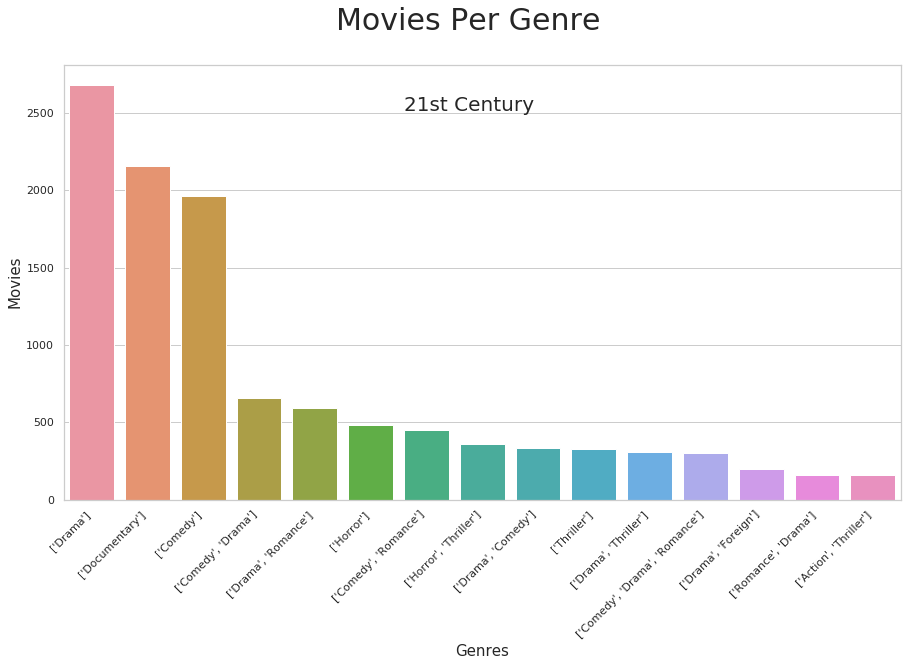

In [65]:
### Temporary to Exclude from Kagle 
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
plt.suptitle('Movies Per Genre',fontsize=30)
plt.figtext(.5,.8,'21st Century',fontsize=20,ha='center')
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Quantity Movies', fontsize=15)
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Genres', y = 'Movies', data=movies_per_genres)
plt.savefig('img2.png',bbox_inches='tight')

## Graphs Analyses

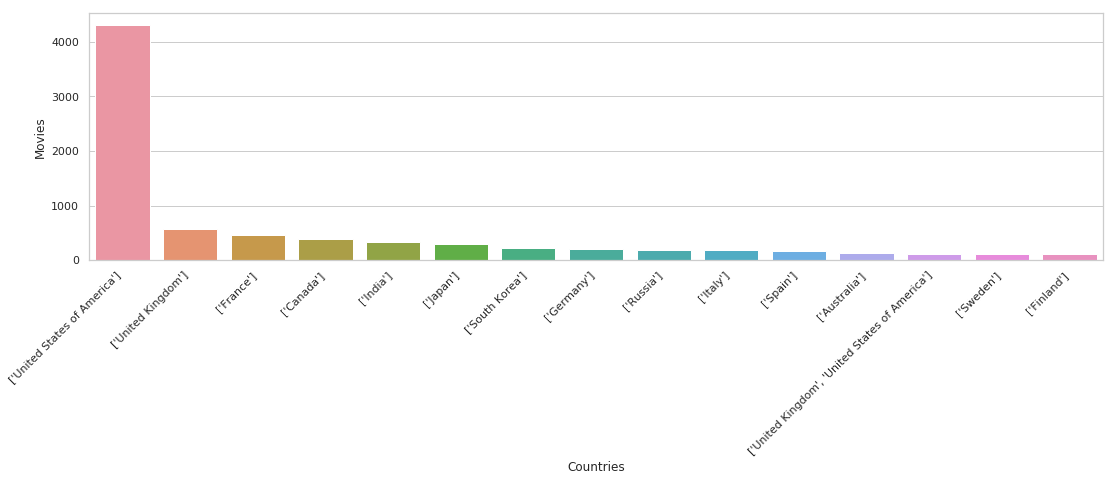

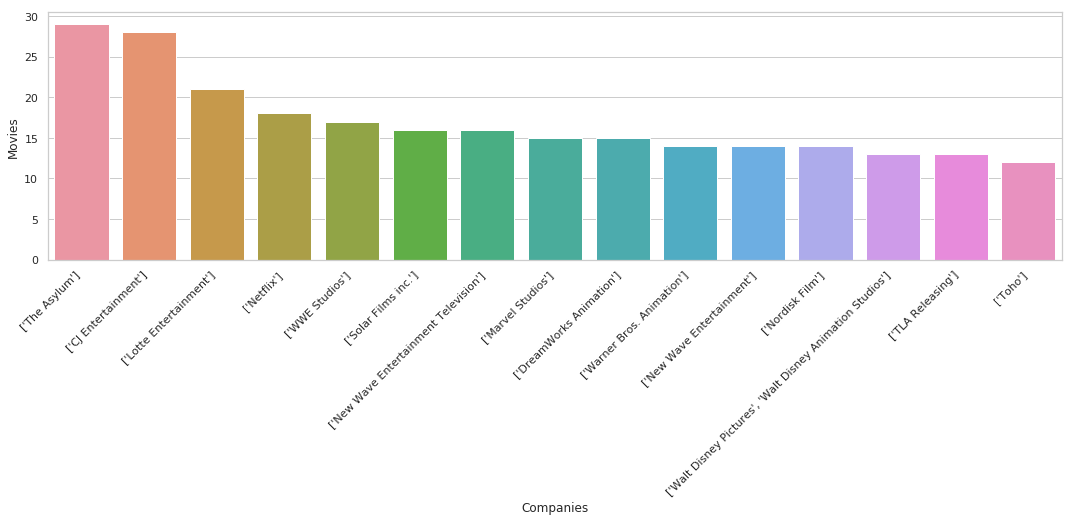

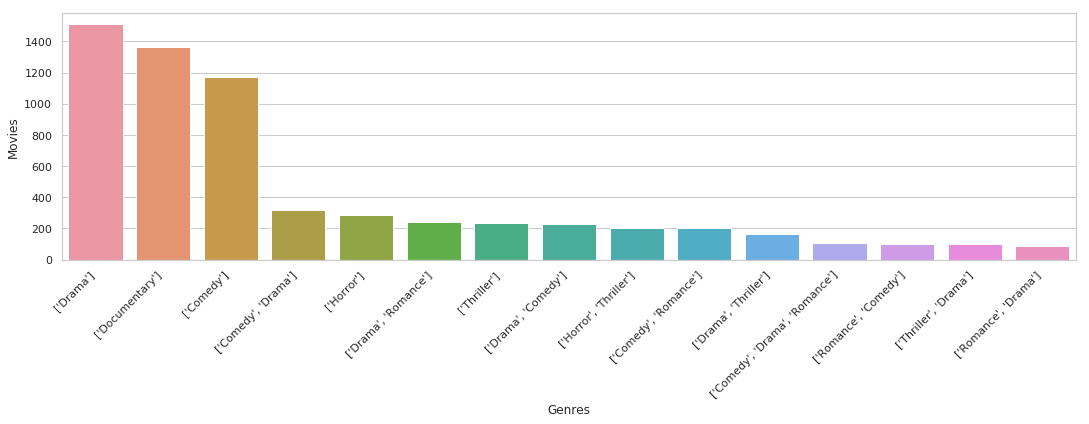

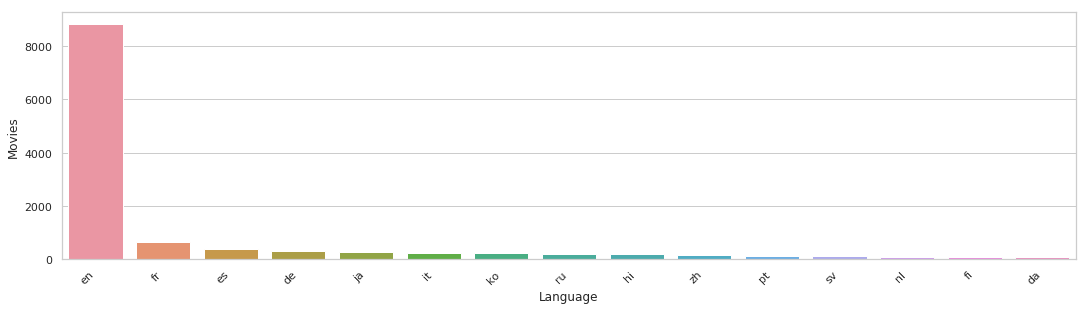

In [17]:
## Graphic Settings
plt.figure(figsize=(40,10))
sns.set(style="whitegrid")
plt.subplot(221)
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Countries', y = 'Movies', data=movies_per_country)

plt.figure(figsize=(40,10))
sns.set(style="whitegrid")
plt.subplot(222)
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Companies', y = 'Movies', data=movies_per_company)

plt.figure(figsize=(40,10))
sns.set(style="whitegrid")
plt.subplot(223)
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Genres', y = 'Movies', data=movies_per_genres)

plt.figure(figsize=(40,10))
sns.set(style="whitegrid")
plt.subplot(224)
plt.xticks(rotation=45, ha='right')
sns.barplot(x = 'Language', y = 'Movies', data=movies_per_language)


# Quantitative Analysis

## Removing Outliers for Revenue

In [19]:
# movies_datasets_rm_outliers_rev = movies_datasets[['production_countries','revenue']].dropna() 
# movies_datasets_rm_outliers_rev['z_score'] = scipy.stats.zscore(movies_datasets_rm_outliers_rev.revenue)
# movies_datasets_rm_outliers_rev = movies_datasets_rm_outliers_rev[(movies_datasets_rm_outliers_rev.z_score < 3) & (movies_datasets_rm_outliers_rev.z_score > -3)]
# movies_datasets_rm_outliers_rev = movies_datasets_rm_outliers_rev.production_countries.isin(['[United States of America]'])
# movies_datasets_rm_outliers_rev
# movies_datasets_rm_outliers_rev = movies_datasets[['production_countries','revenue']]
# movies_datasets_rm_outliers_rev.boxplot()

In [128]:
## Descriptive Analysis for Quantatives Variables

movies_datasets_quant = movies_datasets[['budget','revenue','runtime','vote_average','vote_count','popularity','profit']]
print(movies_datasets_quant.describe())


             budget       revenue       runtime  vote_average    vote_count  \
count  5.854000e+03  4.536000e+03  22857.000000  22732.000000  22774.000000   
mean   2.515499e+07  8.265116e+07     98.351096      5.975787    163.010187   
std    3.899341e+07  1.700683e+08     32.919602      1.253378    624.865968   
min    1.000000e+00  1.000000e+00      1.000000      0.500000      1.000000   
25%    2.500000e+06  1.748115e+06     87.000000      5.300000      5.000000   
50%    1.000000e+07  1.908997e+07     95.000000      6.000000     14.000000   
75%    3.000000e+07  8.525118e+07    108.000000      6.800000     55.000000   
max    3.800000e+08  2.787965e+09   1140.000000     10.000000  14075.000000   

         popularity        profit  
count  24007.000000  6.956000e+03  
mean       3.460772  3.272690e+07  
std        7.480193  1.165665e+08  
min        0.001177 -1.657101e+08  
25%        0.492233 -4.000000e+06  
50%        1.418651 -2.000000e+00  
75%        4.776177  1.742992e+07  


### Correlation Map

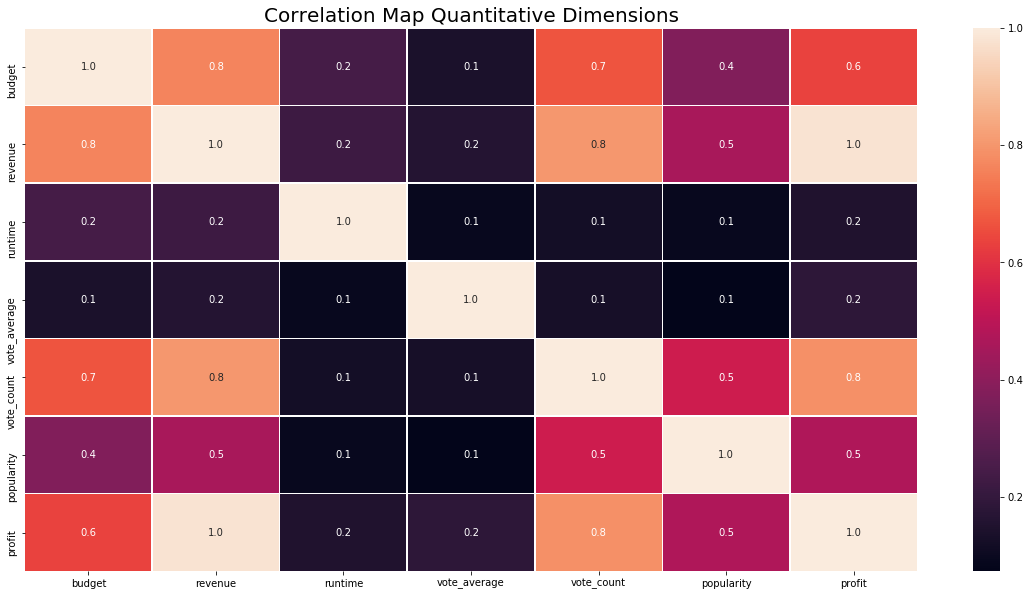

In [154]:
## Correlation Matrix
movies_datasets_quant.corr()

## Correlation Heat Map
f,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(movies_datasets_quant.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlation Map Quantitative Dimensions', fontsize=20)
svm = ax
plt.show()
figure = svm.get_figure()    

figure.savefig('img6',bbox_inches='tight')

### Boxplot

/home/arduin/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


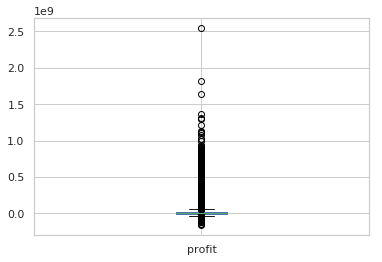

In [22]:
movies_datasets[['production_countries','profit']].plot.box(grid='true')

## Prediction Model

2.8196594189809105


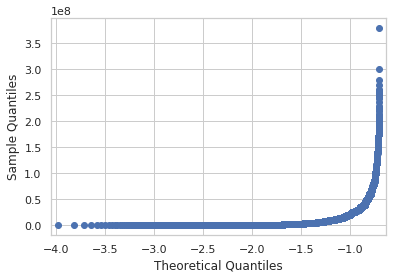

-2.6987893769964555


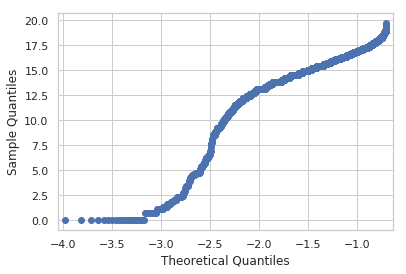

In [30]:
## Normality Assumption 
print(movies_datasets_quant['budget'].skew(skipna=True))
qqplot(movies_datasets_quant['budget'], line='s')
plt.show()

## Normality Assumption log-norm
print(np.log(movies_datasets_quant['budget']).skew(skipna=True))
qqplot(np.log(movies_datasets_quant['budget']), line='s')
plt.show()


In [260]:
# normality test
p = shapiro(np.log(movies_datasets_quant['budget']))
print(p)

(nan, 1.0)


/home/arduin/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
